# Rossman`s Uncertainty-Aware Sales Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train = pd.read_csv('dataset/train.csv', parse_dates=['Date'], low_memory=False)
store = pd.read_csv('dataset/store.csv')

# Merge train with store information
df = pd.merge(train, store, on='Store', how='left')

# Basic Info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

We will also add a 7-day rolling mean to see the "direction" of sales without the daily zig-zags.

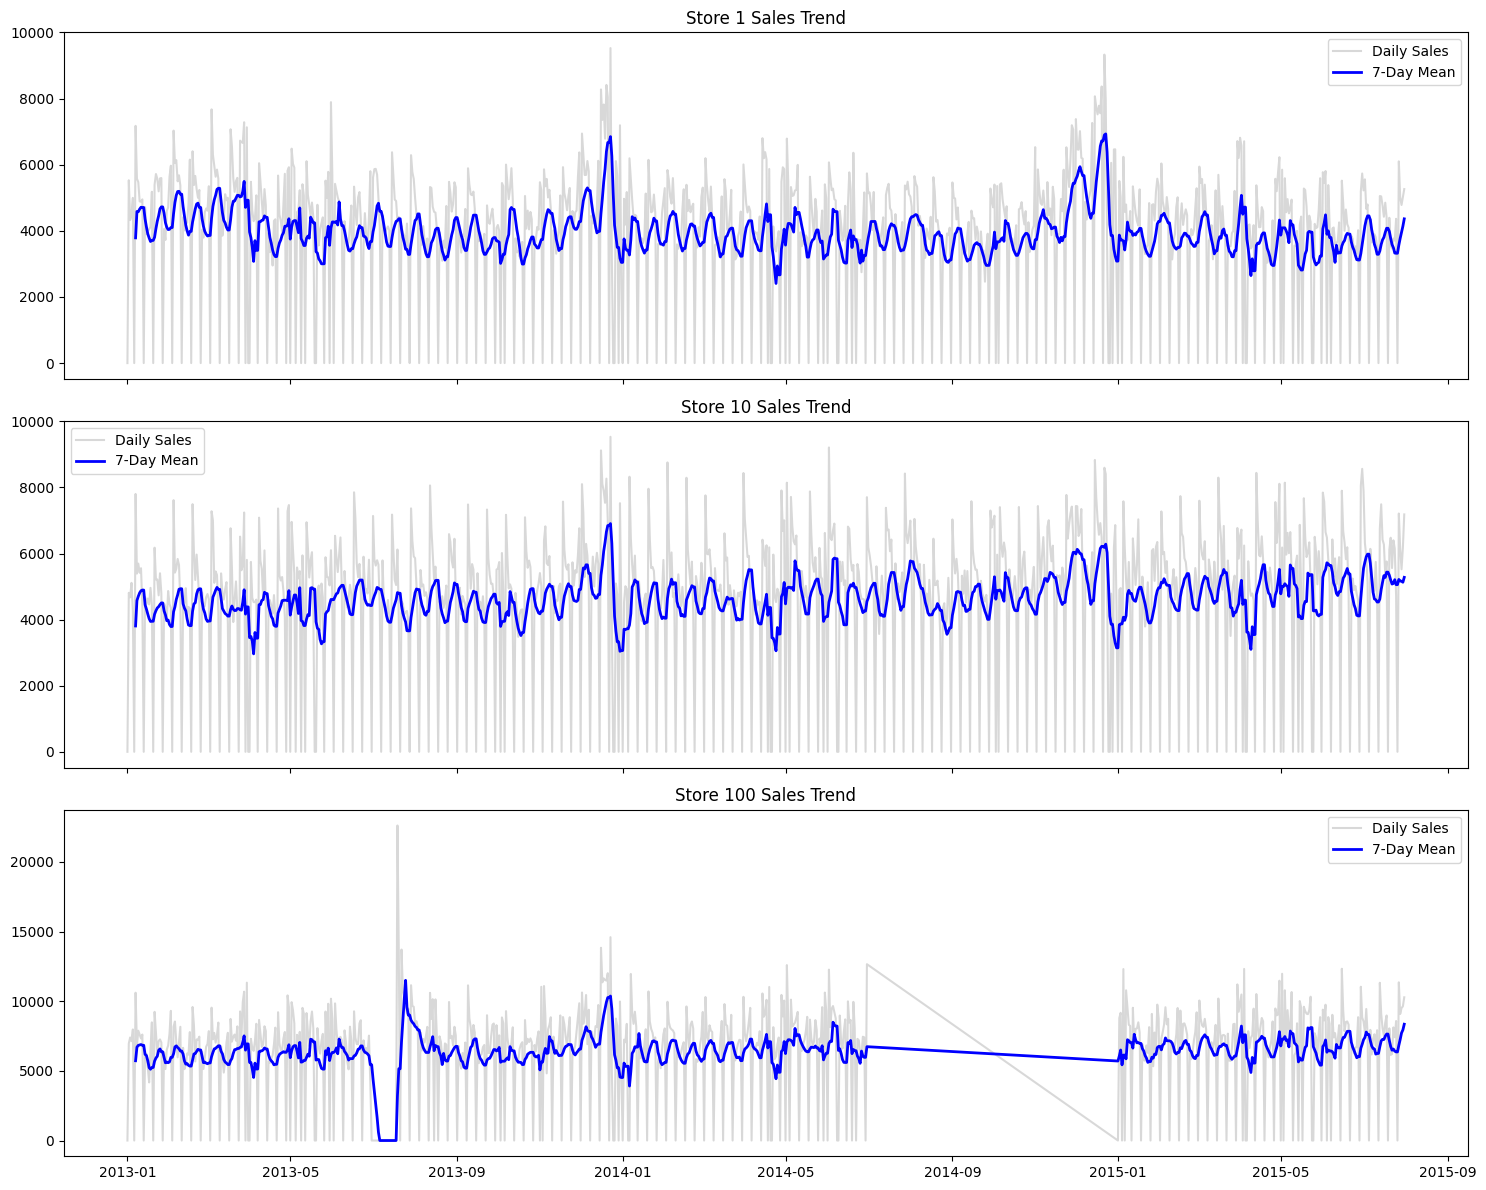

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_stores = [1, 10, 100]
fig, axes = plt.subplots(len(sample_stores), 1, figsize=(15, 12), sharex=True)

for i, store_id in enumerate(sample_stores):
    store_data = df[df['Store'] == store_id].sort_values('Date')
    
    axes[i].plot(store_data['Date'], store_data['Sales'], alpha=0.3, label='Daily Sales', color='gray')
    
    rolling_sales = store_data.set_index('Date')['Sales'].rolling(window=7).mean()
    axes[i].plot(rolling_sales.index, rolling_sales.values, label='7-Day Mean', color='blue', linewidth=2)
    
    axes[i].set_title(f'Store {store_id} Sales Trend')
    axes[i].legend()

plt.tight_layout()
plt.show()

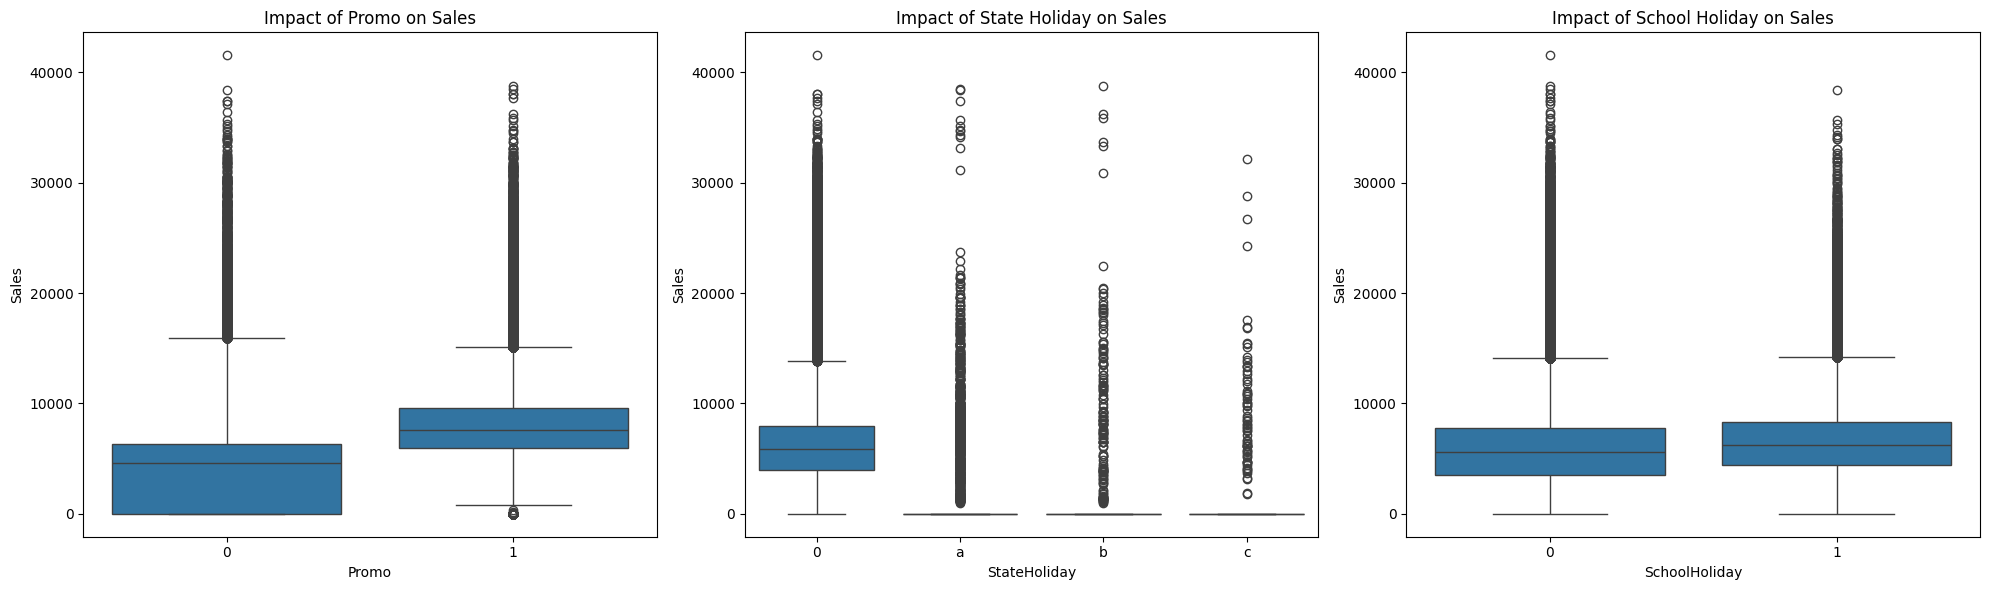

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Impact of Promo
sns.boxplot(data=df, x='Promo', y='Sales', ax=axes[0])
axes[0].set_title('Impact of Promo on Sales')

# Impact of State Holiday (0 = None, a, b, c = Different holidays)
sns.boxplot(data=df, x='StateHoliday', y='Sales', ax=axes[1])
axes[1].set_title('Impact of State Holiday on Sales')

# Impact of School Holiday
sns.boxplot(data=df, x='SchoolHoliday', y='Sales', ax=axes[2])
axes[2].set_title('Impact of School Holiday on Sales')

plt.tight_layout()
plt.show()

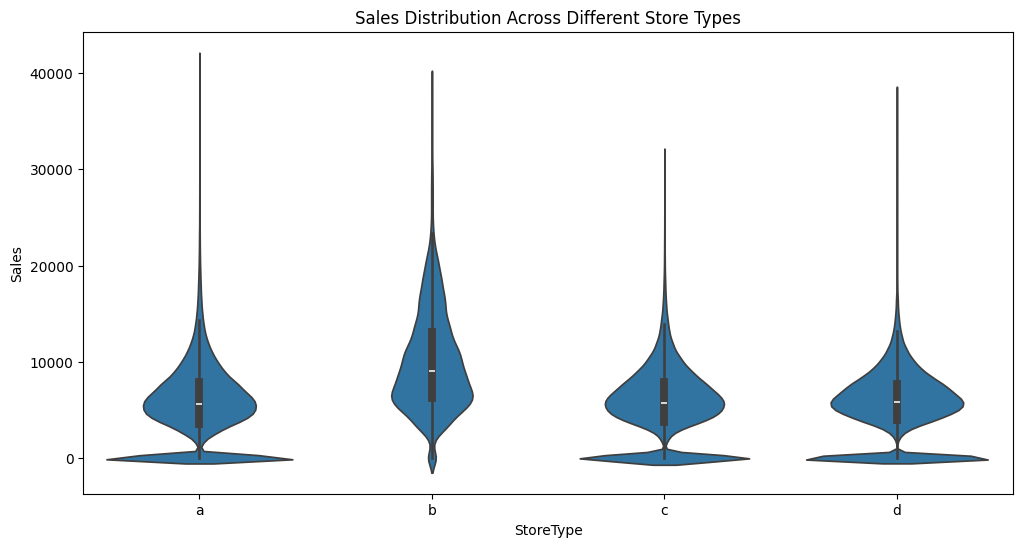

In [4]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='StoreType', y='Sales', order=['a', 'b', 'c', 'd'])
plt.title('Sales Distribution Across Different Store Types')
plt.show()

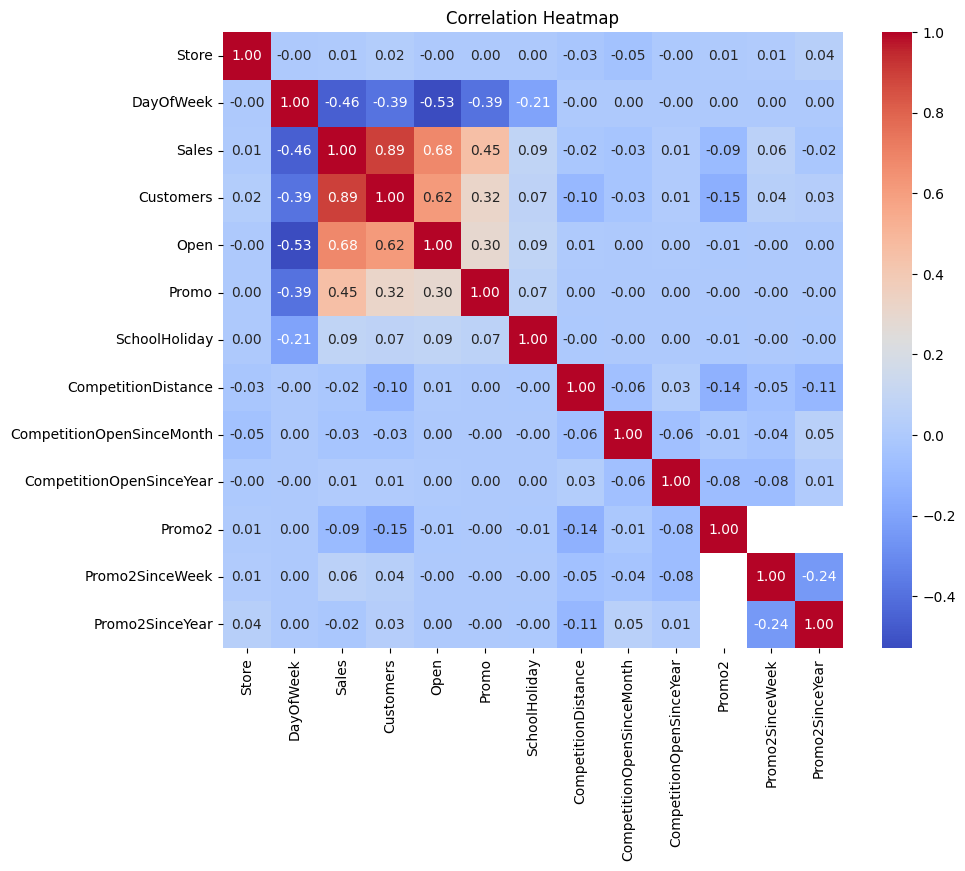

In [5]:
plt.figure(figsize=(10, 8))
# We only correlate numerical columns
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

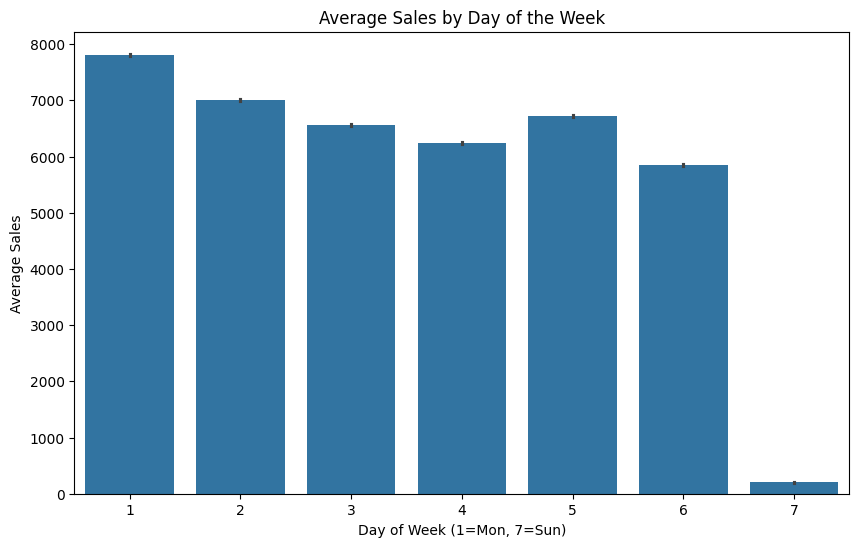

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Sales', data=df)
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of Week (1=Mon, 7=Sun)')
plt.ylabel('Average Sales')
plt.show()

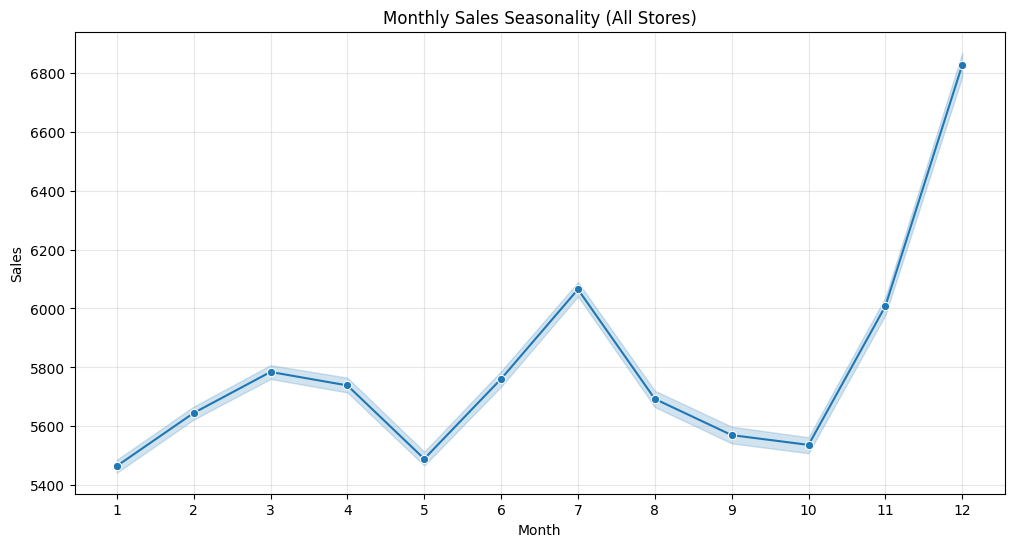

In [8]:
# Extract Month if you haven't already
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', data=df, marker='o')
plt.title('Monthly Sales Seasonality (All Stores)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.show()

Not all stores react to promotions the same way. This grouped bar chart shows how Promo impacts different StoreType categories (a, b, c, d).

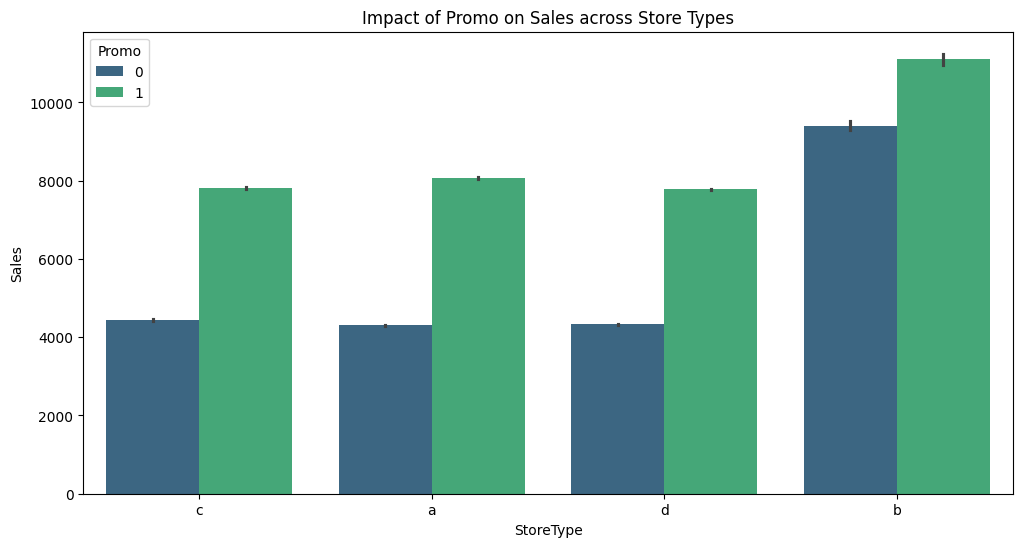

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='StoreType', y='Sales', hue='Promo', data=df, palette='viridis')
plt.title('Impact of Promo on Sales across Store Types')
plt.show()

Does having a competitor nearby actually hurt sales? We’ll use a scatter plot with a regression line to see the correlation.

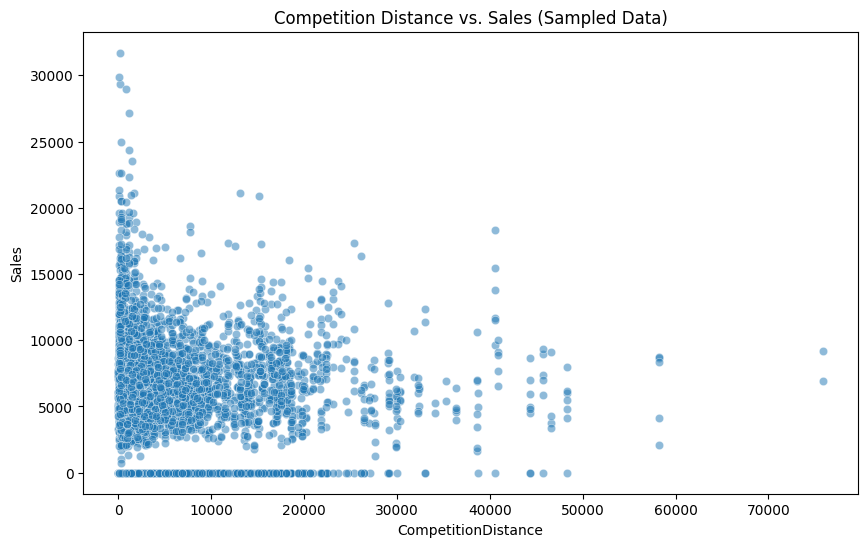

In [10]:
# We'll take a sample to make the scatter plot readable
sample_df = df.dropna(subset=['CompetitionDistance']).sample(5000)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=sample_df, alpha=0.5)
plt.title('Competition Distance vs. Sales (Sampled Data)')
plt.show()